In [5]:
import pandas as pd
df=pd.read_excel("Delta.xlsx")
df1=pd.read_excel("TSMC.xlsx")
print(df.head())           #檢視個別資料前五筆
print(df1.head())  

         Date   Open   High    Low  Close
0  2019/11/21  135.5  137.5  135.0  137.5
1  2019/11/20  139.0  139.0  136.5  137.0
2  2019/11/19  137.0  139.5  136.0  139.5
3  2019/11/18  134.0  136.5  134.0  136.5
4  2019/11/15  134.0  135.0  133.0  133.5
         Date  Open    High    Low  Close
0  2019/11/21  309.5  311.0  307.0  311.0
1  2019/11/20  314.0  314.0  312.0  313.5
2  2019/11/19  312.5  315.0  311.0  315.0
3  2019/11/18  308.5  311.0  307.0  311.0
4  2019/11/15  305.5  307.5  304.5  307.0


RSI_5 [42.85714286 42.85714286 42.85714286 ... 80.09432541 71.35712585
 58.14329087]
RSI_10 [75.         75.         75.         ... 73.5002462  69.41942875
 62.94737335]


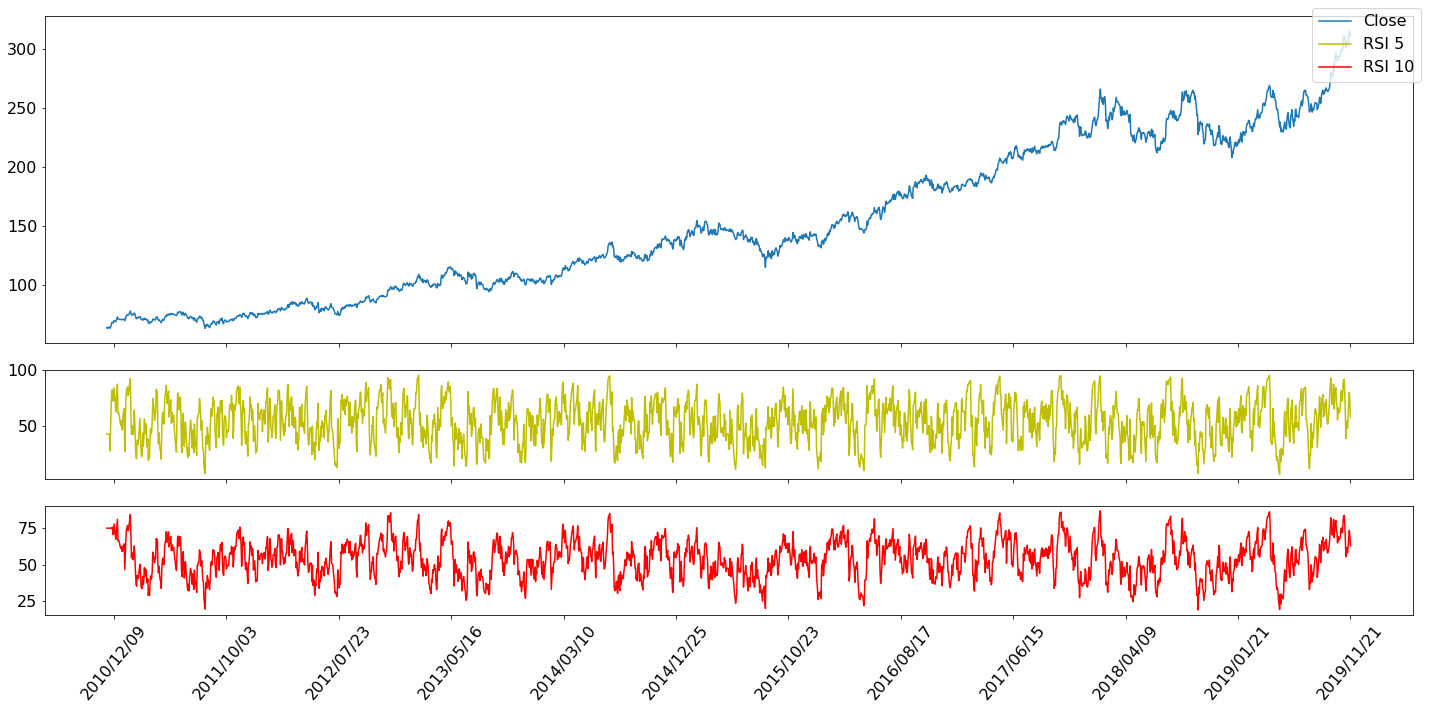

In [7]:
def RSI(prices, n=14):
    deltas = np.diff(prices)
    seed = deltas[:n+1]
    up = seed[seed>=0].sum()/n
    down = -seed[seed<0].sum()/n
    rs = up/down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100./(1.+rs)

    for i in range(n, len(prices)):
        delta = deltas[i-1] # cause the diff is 1 shorter

        if delta>0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up*(n-1) + upval)/n
        down = (down*(n-1) + downval)/n

        rs = up/down
        rsi[i] = 100. - 100./(1.+rs)

    return rsi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

df1 = pd.read_excel("TSMC.xlsx")
df11 = df1.iloc[::-1].reset_index(drop=True)

RSI_5 = RSI(df11.Close, 5)
RSI_10 = RSI(df11.Close, 10)

print("RSI_5",RSI_5)
print("RSI_10",RSI_10)

plt.rcParams["font.size"] = "16"
freq = 200
start = 0
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,10), gridspec_kw={'height_ratios': [3, 1, 1]}, sharex=True)
ax1.plot(df11.Date[start:], df11.Close[start:], label="Close")
ax1.set_xticks([])

ax2.plot(df11.Date[start:], RSI_5[start:], label="RSI 5", color="y")
ax2.set_xticks([])

ax3.plot(df11.Date[start:], RSI_10[start:], label="RSI 10", color="r")
ax3.set_xticks(df1.Date[start::freq])
ax3.set_xticklabels(df1.Date[start::freq], rotation=50)

plt.setp(ax1.get_xticklabels(), visible=False)
fig.legend()
fig.tight_layout()
plt.show()    

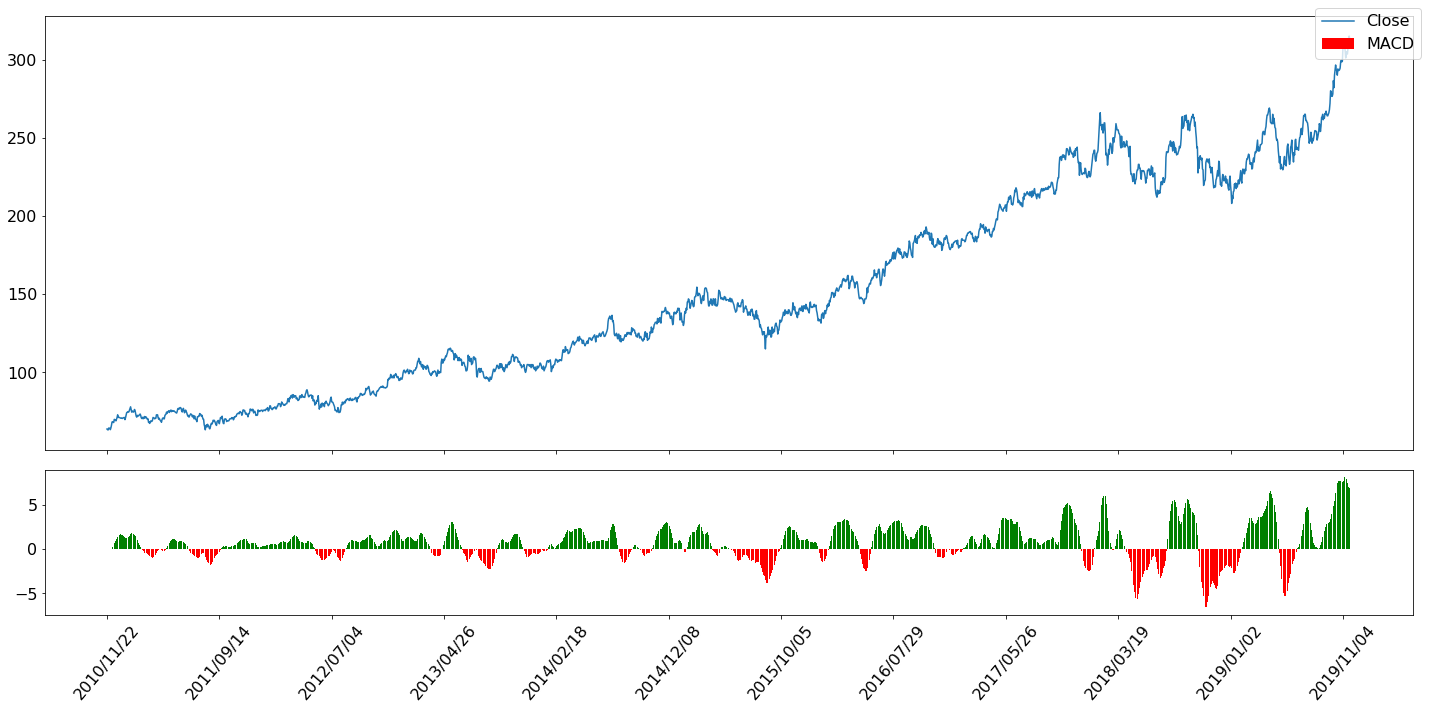

In [8]:
def MACD(close):
    exp1 = close.ewm(span=12, adjust=False).mean()
    exp2 = close.ewm(span=26, adjust=False).mean()
    macd = exp1-exp2
    exp3 = macd.ewm(span=9, adjust=False).mean()
    return exp3

plt.rcParams["font.size"] = "16"
macd = MACD(df11.Close)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
freq = 200
start = 0

ax1.plot(df11.Date[start:], df11.Close[start:], label="Close")
ax1.set_xticks([])

ax2.bar(df11.Date[start:], macd[start:], label="MACD", color=np.where(macd > 0, 'g', 'r'))
ax2.set_xticks(df11.Date[start::freq])
ax2.set_xticklabels(df11.Date[start::freq], rotation=50)

plt.setp(ax1.get_xticklabels(), visible=False)
fig.legend()
fig.tight_layout()
plt.show()      